### 1. Packages 

First, let's run the cell below to import all the packages that you will need.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

### 2. Dataset

In [2]:
(ds_train, ds_validation), ds_info = tfds.load(
    'imagenette',
    split=['train','validation'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

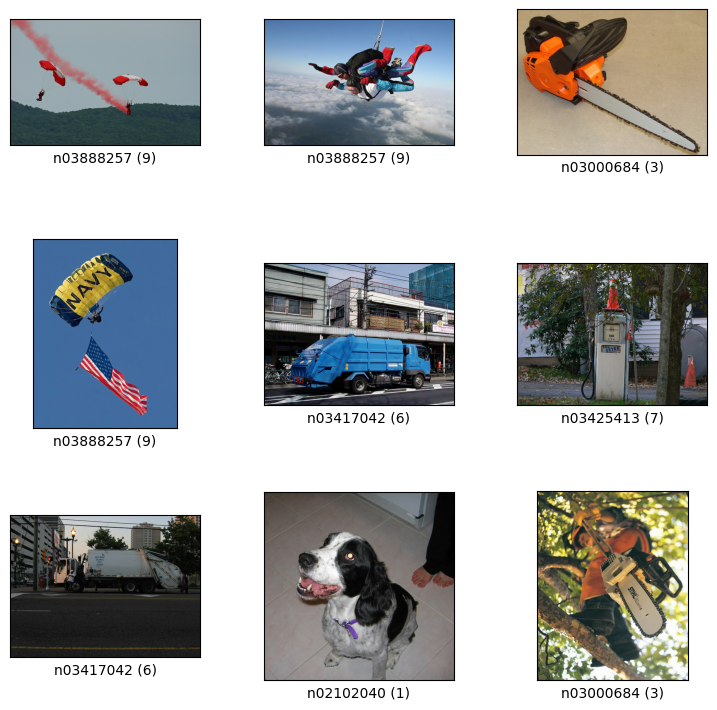

In [3]:
fig = tfds.show_examples(ds_train, ds_info)

In [4]:
IMAGE_SIZE = 128
BATCH_SIZE = 64

def normalize_img(image, label):
    image = tf.image.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(BATCH_SIZE)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

ds_validation = ds_validation.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_validation = ds_validation.batch(BATCH_SIZE)
ds_validation = ds_validation.prefetch(tf.data.experimental.AUTOTUNE)

### 3. Training

In [5]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer((IMAGE_SIZE, IMAGE_SIZE, 3)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10),
    ], name='my_model'
)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(3e-4),
    metrics=['accuracy'],
)

model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 100352)            0  

In [ ]:
# [layer1, layer2, layer3] = model.layers
# W1, b1 = layer1.get_weights()
# W2, b2 = layer2.get_weights()
# W3, b3 = layer3.get_weights()
# print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
# print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
# print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

In [6]:
history = model.fit(
    ds_train,
    epochs=10,
    verbose=2,
)

Epoch 1/10
148/148 - 202s - loss: 1.9725 - accuracy: 0.3145 - 202s/epoch - 1s/step
Epoch 2/10
148/148 - 167s - loss: 1.4197 - accuracy: 0.5323 - 167s/epoch - 1s/step
Epoch 3/10
148/148 - 178s - loss: 1.1582 - accuracy: 0.6296 - 178s/epoch - 1s/step
Epoch 4/10
148/148 - 179s - loss: 0.9747 - accuracy: 0.6881 - 179s/epoch - 1s/step
Epoch 5/10
148/148 - 176s - loss: 0.8428 - accuracy: 0.7329 - 176s/epoch - 1s/step
Epoch 6/10
148/148 - 174s - loss: 0.7125 - accuracy: 0.7763 - 174s/epoch - 1s/step
Epoch 7/10
148/148 - 184s - loss: 0.5940 - accuracy: 0.8153 - 184s/epoch - 1s/step
Epoch 8/10
148/148 - 182s - loss: 0.4888 - accuracy: 0.8481 - 182s/epoch - 1s/step
Epoch 9/10
148/148 - 177s - loss: 0.3608 - accuracy: 0.8919 - 177s/epoch - 1s/step
Epoch 10/10
148/148 - 178s - loss: 0.2643 - accuracy: 0.9260 - 178s/epoch - 1s/step


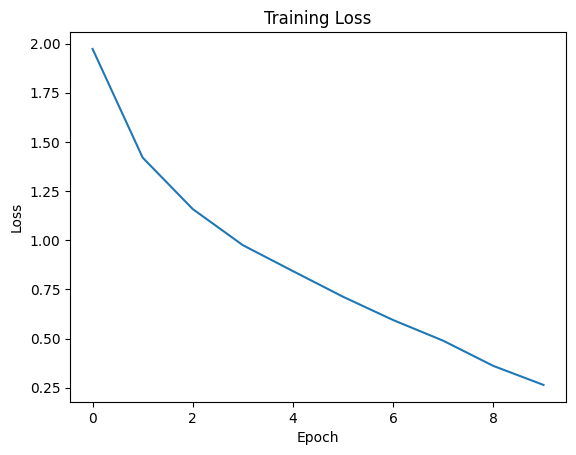

In [7]:
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### 4. Test

In [8]:
model.evaluate(ds_validation)

62/62 [==============================] - 23s 332ms/step - loss: 1.4465 - accuracy: 0.6206


[1.446455955505371, 0.6206369400024414]